# 2D Classification with a Single Neuron

We'll implement a script to classify 2D data using a single neuron.

## Load Data

We implement the function `load_data()`, add it to `loader.py` ...

```python 
def load_data(filename):
    import csv
    from numpy import asarray, reshape
    
    with open(filename) as f:
        reader = csv.reader(f)
        header = next(reader)
        data = []
        for row in reader:
            data.append(row)
        data = asarray(data).astype(float)

    x = data[:, 0:-1] # input data

    num_samples = data.shape[0]
    y = reshape(data[:, -1], (num_samples, 1)) # output / target / groundtruth
    
    return (x, y)
```

... and use it to load the data.

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_class_2d_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[ 1.13210319 -1.4066463 ]
 [-1.09042665  1.92715243]
 [-0.76551909 -0.14404298]
 [ 0.12162179 -0.78994452]
 [-0.47511814 -1.61110253]
 [ 0.22451311  0.54315986]
 [-0.2498135   0.0686202 ]
 [ 0.95858174  1.26612468]
 [ 1.94770422  0.88129908]
 [-0.23942295  0.49355215]
 [-0.86684561  0.32131904]
 [-0.23114367  1.44038263]
 [-0.40099583 -0.26931807]
 [ 1.35830369  0.1398443 ]
 [-1.50464579 -0.58452625]
 [ 0.15401177  1.41957166]
 [ 1.18233301 -0.05716118]
 [ 0.48304064 -1.01761707]
 [ 0.19611033 -2.0721155 ]
 [-0.54700911 -0.15378581]]
y_gt: [[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]


## Visualize Data

We implement the function `plot_data_2d()` and save it in `plotting.py`.

```python
def plot_data_1d(x, y_gt):
    import matplotlib.pyplot as plt

    plt.scatter(x, y_gt, s=20, c="k")
    plt.axis("equal")
    plt.xlabel("x0", fontsize=24)
    plt.ylabel("y", fontsize=24)
    plt.tick_params(axis="both", which="major", labelsize=16)
    plt.show()
```

We now use this function to visualize the data.


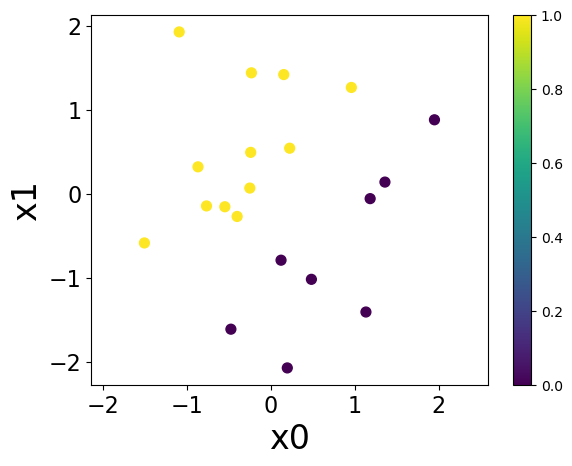

In [2]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Neuron

We now create a single neuron with one vectorial weigth `w` and one vectorial input `x` (which can also be a 2D numpy vector if there are multiple imput vectors) ...

In [3]:
def neuron_clas_2d(w, x):
    return (x @ w > 0).astype(int)

... randomly initialize its weight vector ...

In [4]:
from numpy.random import default_rng

rng = default_rng()
w = rng.standard_normal(size=(2,))

... and obtain its prediction `y_p` for the input data (which has the same shape as `x`).

In [5]:
y_p = neuron_clas_2d(w, x)

## Visualize Predictions by Randomly Initialized Neuron

We now plot its predictions using the function `plot_pred_2d`, which we also add to `plotting.py`.

```python
def plot_pred_2d(x, y_gt, y_p):
    import matplotlib.pyplot as plt

    plt.scatter(x[:, 0], x[:, 1], c=y_gt, s=50, label="ground truth")
    plt.colorbar()
    plt.scatter(x[:, 0], x[:, 1], c=y_p, s=100, marker="x", label="predicted")
    plt.legend(fontsize=20)
    plt.axis("equal")
    plt.xlabel("x0", fontsize=24)
    plt.ylabel("x1", fontsize=24)
    plt.tick_params(axis="both", which="major", labelsize=16)
    plt.show()
```


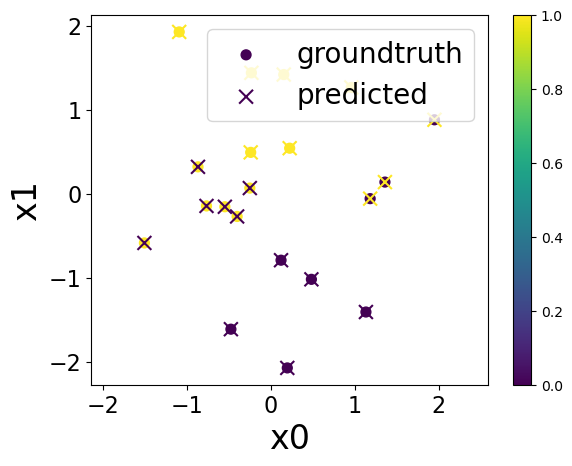

In [6]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p)

## Training

We now train the neuron ...

In [7]:
num_samples = len(x)
num_train_iterations = 100
eta = .1 # learning rate

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples) # select random sample
    x_selected = x[selected]
    y_gt_selected = y_gt[selected]

    y_p_selected = neuron2d(w, x_selected) # neuron prediction

    error = y_p_selected - y_gt_selected # calculate error

    w -= eta * error * x_selected # update neuron weights

    print(f"i={i} w0={w[0]:.2f} w1={w[1]:.2f} error={error[0]:.2f}")

i=0 w0=0.38 w1=0.92 error=-1.00
i=1 w0=0.38 w1=0.92 error=0.00
i=2 w0=0.36 w1=0.93 error=-1.00
i=3 w0=0.36 w1=0.93 error=0.00
i=4 w0=0.30 w1=0.92 error=-1.00
i=5 w0=0.23 w1=0.90 error=-1.00
i=6 w0=0.23 w1=0.90 error=0.00
i=7 w0=0.15 w1=0.89 error=-1.00
i=8 w0=0.09 w1=0.87 error=-1.00
i=9 w0=-0.10 w1=0.78 error=1.00
i=10 w0=-0.10 w1=0.78 error=0.00
i=11 w0=-0.30 w1=0.70 error=1.00
i=12 w0=-0.30 w1=0.70 error=0.00
i=13 w0=-0.30 w1=0.70 error=0.00
i=14 w0=-0.30 w1=0.70 error=0.00
i=15 w0=-0.30 w1=0.70 error=0.00
i=16 w0=-0.30 w1=0.70 error=0.00
i=17 w0=-0.30 w1=0.70 error=0.00
i=18 w0=-0.30 w1=0.70 error=0.00
i=19 w0=-0.30 w1=0.70 error=0.00
i=20 w0=-0.30 w1=0.70 error=0.00
i=21 w0=-0.30 w1=0.70 error=0.00
i=22 w0=-0.30 w1=0.70 error=0.00
i=23 w0=-0.30 w1=0.70 error=0.00
i=24 w0=-0.30 w1=0.70 error=0.00
i=25 w0=-0.30 w1=0.70 error=0.00
i=26 w0=-0.30 w1=0.70 error=0.00
i=27 w0=-0.34 w1=0.67 error=-1.00
i=28 w0=-0.34 w1=0.67 error=0.00
i=29 w0=-0.34 w1=0.67 error=0.00
i=30 w0=-0.34 w1=0.67 

... and plot its performance, again using the function `plot_pred_2d` from `plotting.py`.

In [ ]:
plot_pred_2d(x, y_gt, y_p=neuron_clas_2d(w, x))

## Testing

We now check how the trained neuron works on the test data.

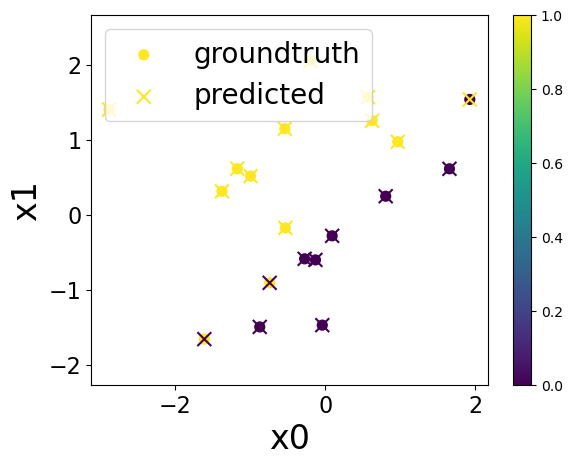

In [8]:
(x_test, y_gt_test) = load_data(filename="data_class_2d_clean_test.csv")

plot_pred_2d(x_test, y_gt_test, y_p=neuron_clas_2d(w, x_test))